 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [103]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [104]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [105]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [106]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [107]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [108]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [109]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [110]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [111]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [112]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [113]:
# Calculate Daily Returns and Drop Nulls
sp500_returns_df = sp500_df.pct_change().dropna()
sp500_returns_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [114]:
# Rename Column
sp500_returns_df.rename({'Close':'S&P 500'}, axis=1, inplace=True)
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [115]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, sp500_returns_df], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

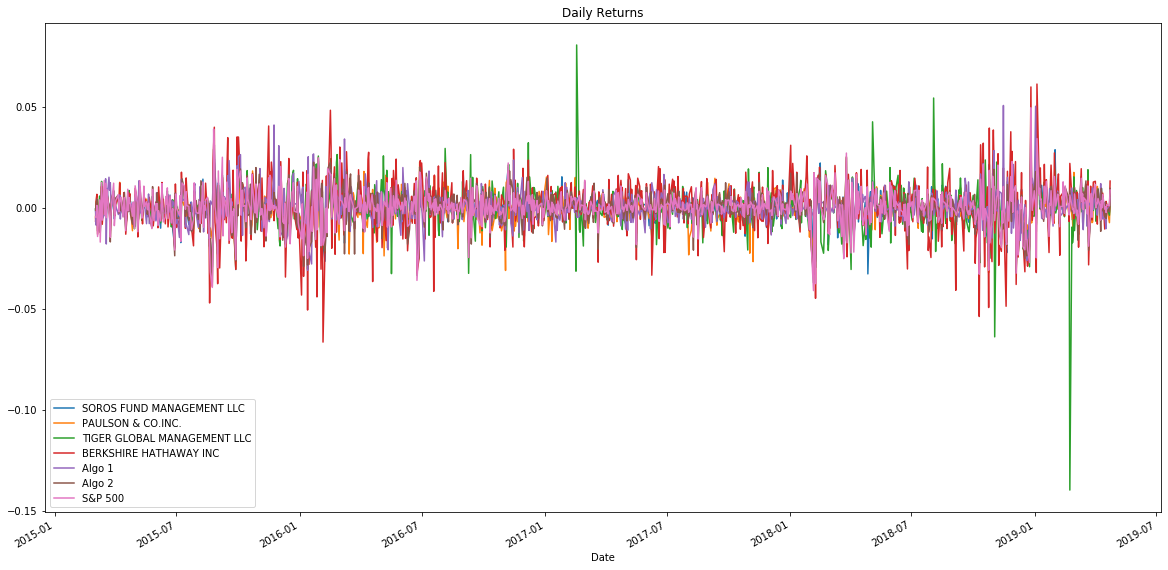

In [116]:
# Plot daily returns
combined_df.plot(figsize=(20,10), title="Daily Returns")

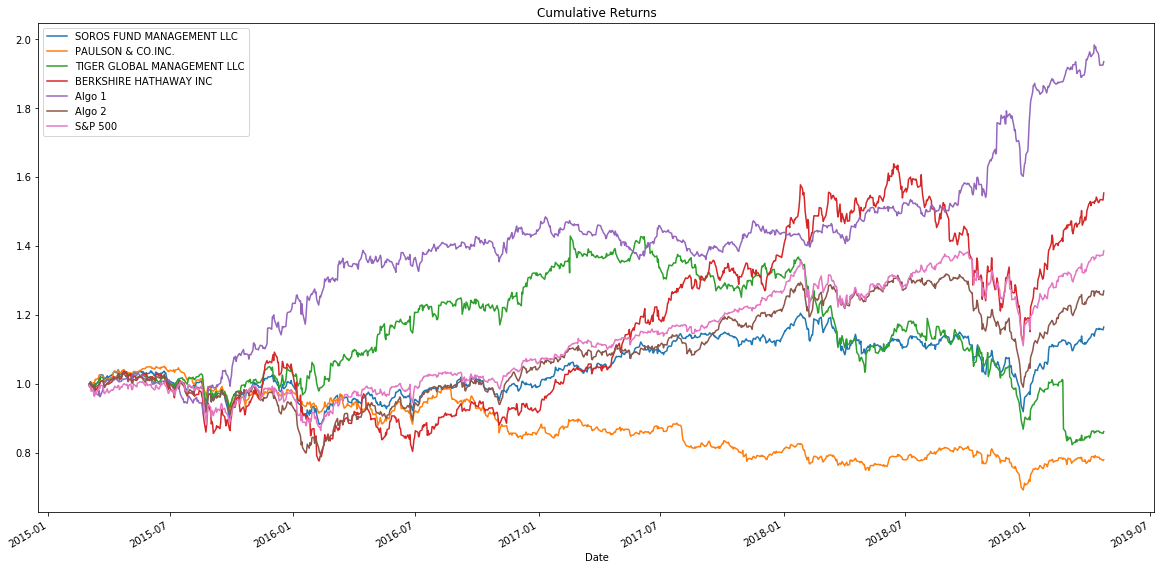

In [117]:
# Plot cumulative returns
(1 + combined_df).cumprod().plot(figsize=(20,10), title="Cumulative Returns")

Over the 4 year period, Algo 1 and Berkshire Hathaway outperformed the S&P 500.

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

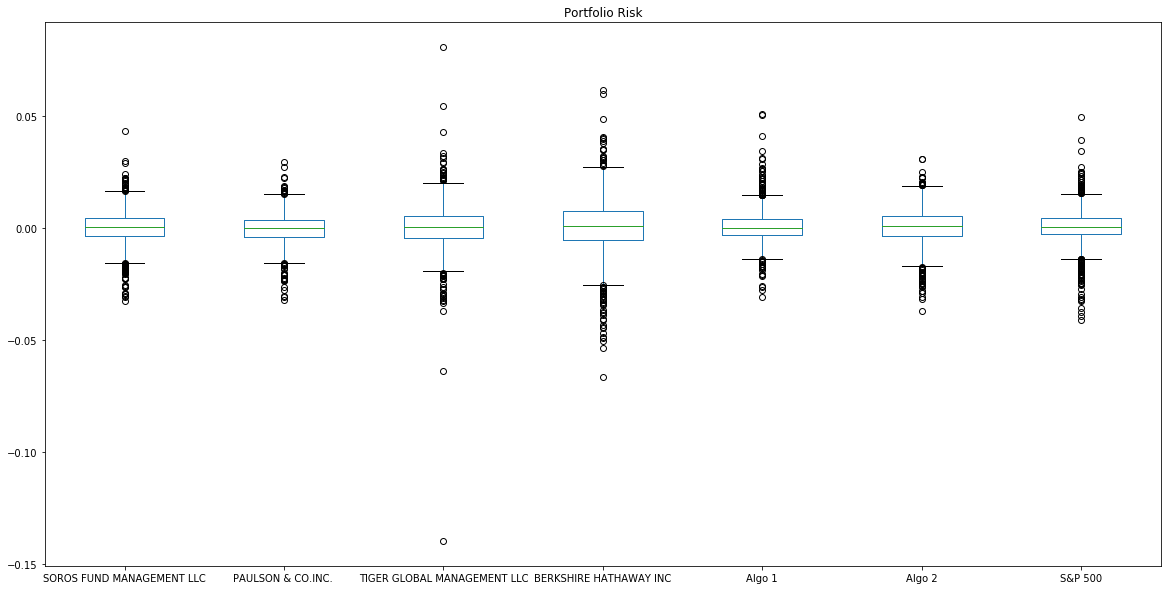

In [118]:
# Box plot to visually show risk
combined_df.plot(kind='box', figsize=(20,10), title="Portfolio Risk")

Tiger Global Management has the largest spread of risk; from eyeing the box plot, both Paulson & Co and Algo 2 have the smallest spread of risk.

In [119]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
std_df = combined_df.std()
std_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [120]:
# Determine which portfolios are riskier than the S&P 500
std_df.gt(std_df['S&P 500'])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [121]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_df = combined_df.std() * np.sqrt(252)
annual_std_df

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

In [122]:
# Determine which portfolios are riskier than the S&P 500 based on the annualized standard deviation
annual_std_df.gt(annual_std_df['S&P 500'])

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

Both Tiger Global Managment and Berkshire Hathaway have higher standard deviations than the S&P 500 and are therefore considered higher risk since they have larger variability in returns.

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

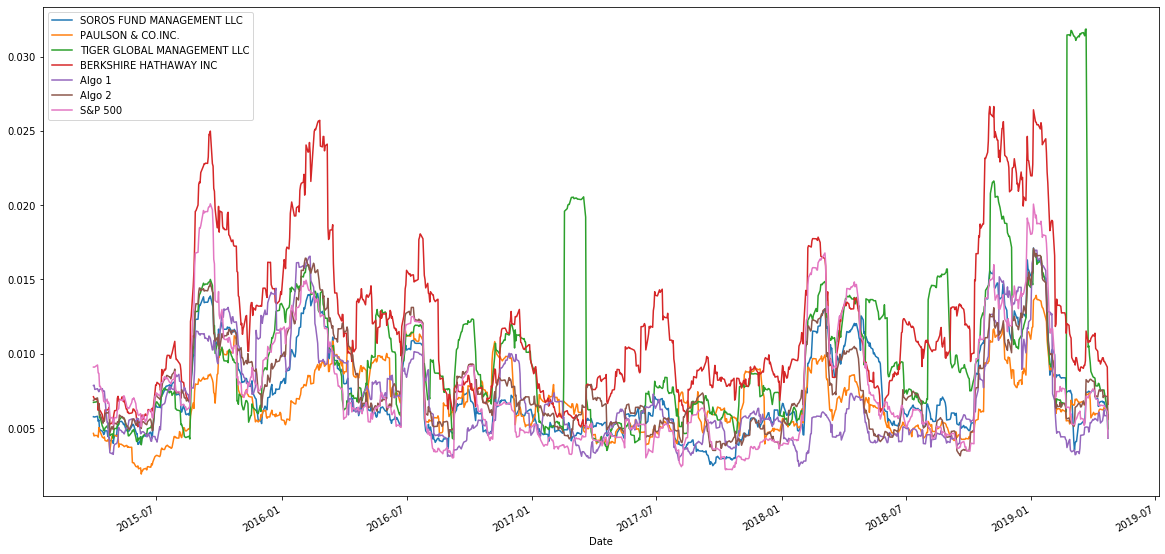

In [123]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(figsize=(20,10))

For the most part the standard deviations follow the trend of the S&P; the outliers appear to be Tiger Global Management and Berkshire Hathaway which is consisent with the risk analysis.

In [124]:
# Construct a correlation table
corr_df = combined_df.corr()
corr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


Algo 2 and Soros Fund are more correlated with the S&P

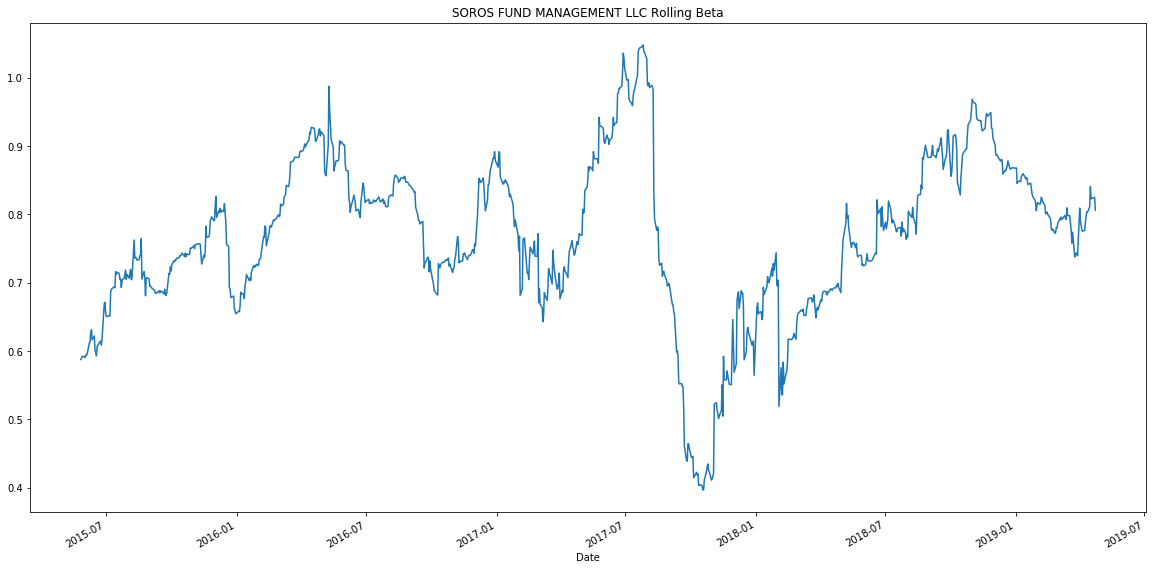

In [125]:
# Calculate 60-day rolling covariance SOROS FUND MANAGEMENT LLC compared to the total market (S&P 500)
roll_soros_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate 60-day rolling variance of S&P 500
roll_sp500_variance = combined_df['S&P 500'].rolling(window=60).var()
# Calculate 60-day rolling beta of SOROS FUND MANAGEMENT LLC
roll_soros_beta = roll_soros_covariance / roll_sp500_variance
roll_soros_beta.plot(figsize=(20,10), title="SOROS FUND MANAGEMENT LLC Rolling Beta")

Not sure how to judge sensitivity to the S&P from the graph. SOROS FUND MANAGEMENT generally has a beta below one meaning that the portfolio is performing worse than the S&P.

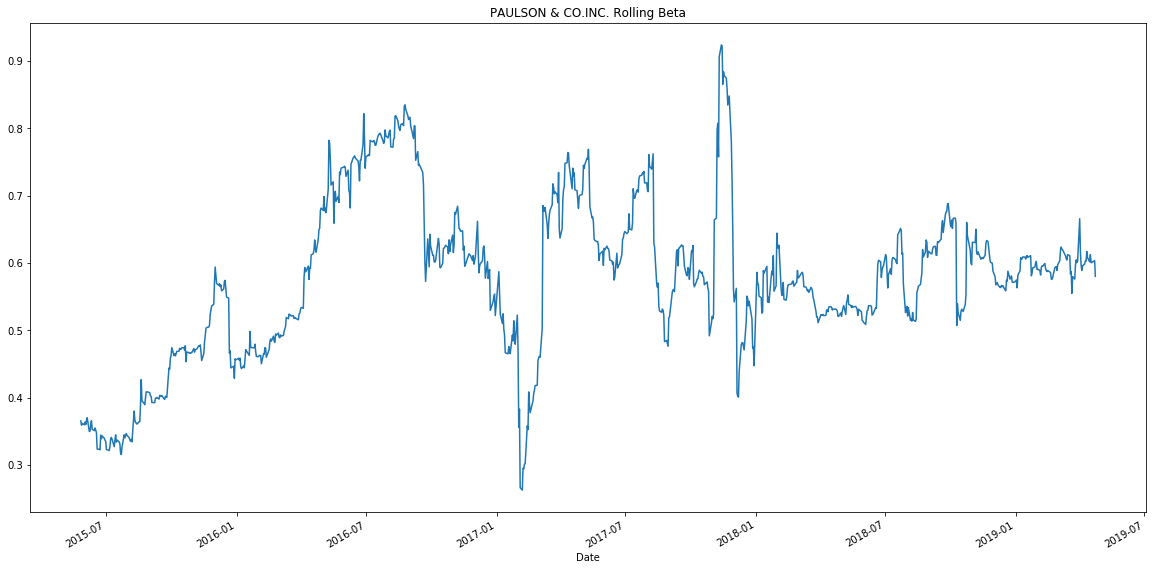

In [126]:
# Calculate 60-day rolling covariance PAULSON & CO.INC. compared to the total market (S&P 500)
roll_paul_covariance = combined_df['PAULSON & CO.INC. '].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate 60-day rolling variance of S&P 500
roll_sp500_variance = combined_df['S&P 500'].rolling(window=60).var()
# Calculate 60-day rolling beta of PAULSON & CO.INC.
roll_paul_beta = roll_paul_covariance / roll_sp500_variance
roll_paul_beta.plot(figsize=(20,10), title="PAULSON & CO.INC. Rolling Beta")

PAULSON & CO is also performing worse than the S&P.

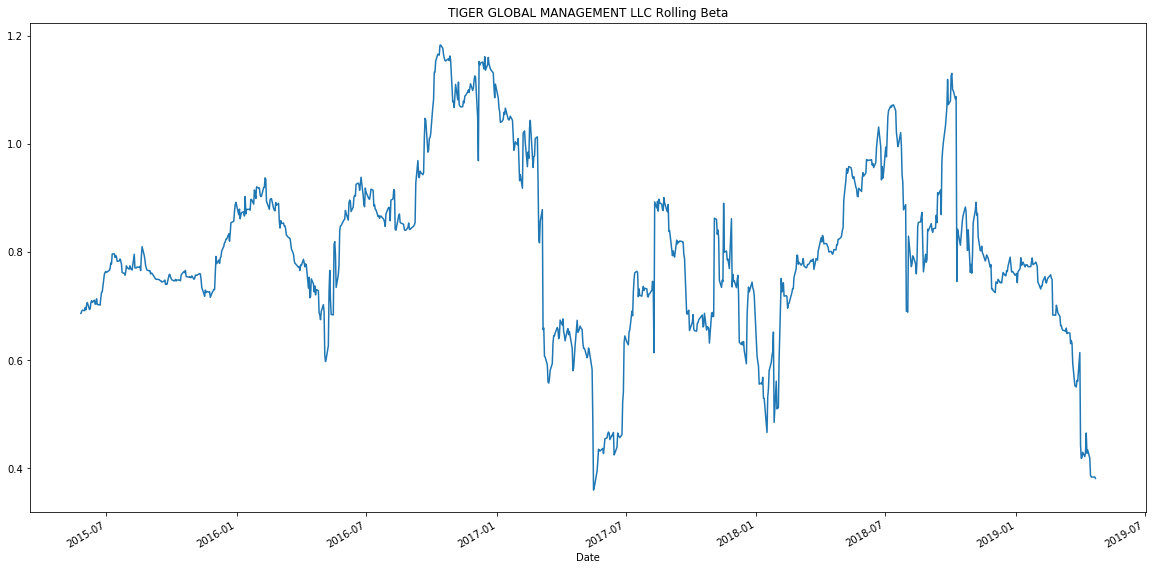

In [127]:
# Calculate 60-day rolling covariance TIGER GLOBAL MANAGEMENT LLC compared to the total market (S&P 500)
roll_tiger_covariance = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate 60-day rolling variance of S&P 500
roll_tiger_variance = combined_df['S&P 500'].rolling(window=60).var()
# Calculate 60-day rolling beta of TIGER GLOBAL MANAGEMENT LLC
roll_tiger_beta = roll_tiger_covariance / roll_sp500_variance
roll_tiger_beta.plot(figsize=(20,10), title="TIGER GLOBAL MANAGEMENT LLC Rolling Beta")

TIGER GLOBAL MANAGEMENT at times performs better than the S&P (beta > 1); however, it mostly underperforms.

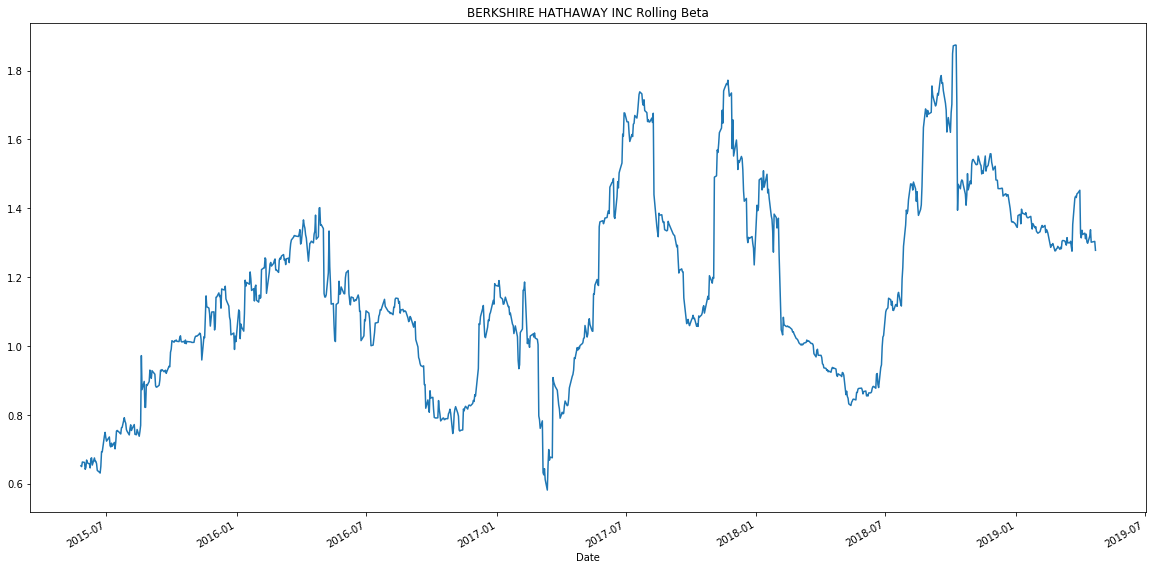

In [128]:
# Calculate 60-day rolling covariance BERKSHIRE HATHAWAY INC compared to the total market (S&P 500)
roll_berk_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate 60-day rolling variance of S&P 500
roll_sp500_variance = combined_df['S&P 500'].rolling(window=60).var()
# Calculate 60-day rolling beta of BERKSHIRE HATHAWAY INC
roll_berk_beta = roll_berk_covariance / roll_sp500_variance
roll_berk_beta.plot(figsize=(20,10), title="BERKSHIRE HATHAWAY INC Rolling Beta")

BERKSHIRE HATHAWAY performs better than the S&P most of the time.

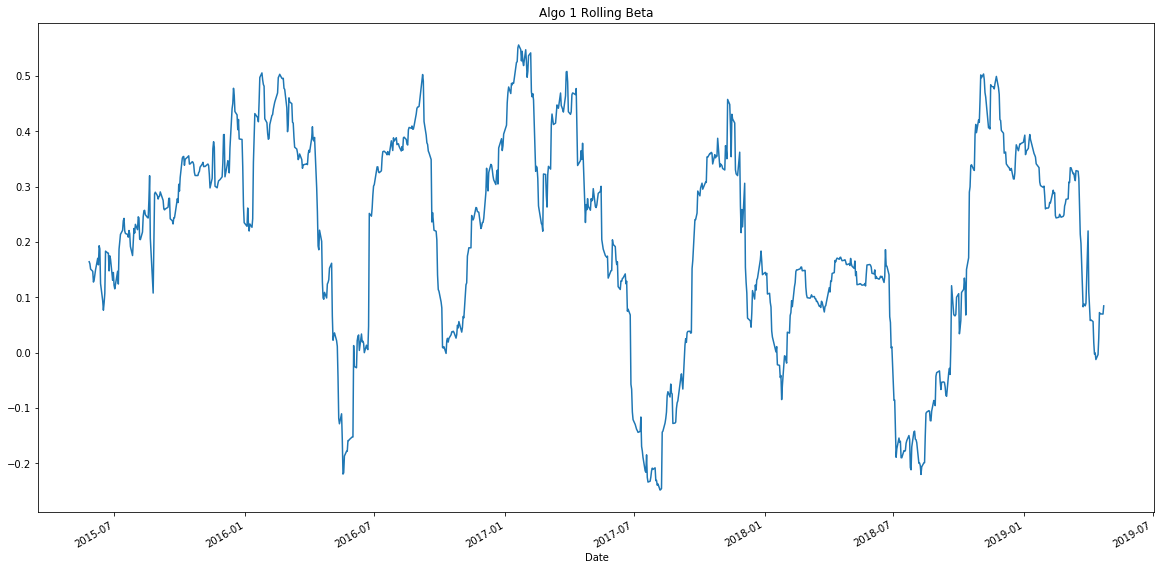

In [129]:
# Calculate 60-day rolling covariance Algo 1 compared to the total market (S&P 500)
roll_algo1_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate 60-day rolling variance of S&P 500
roll_sp500_variance = combined_df['S&P 500'].rolling(window=60).var()
# Calculate 60-day rolling beta of Algo 1
roll_algo1_beta = roll_algo1_covariance / roll_sp500_variance
roll_algo1_beta.plot(figsize=(20,10), title="Algo 1 Rolling Beta")

Algo 1 underperforms the S&P.

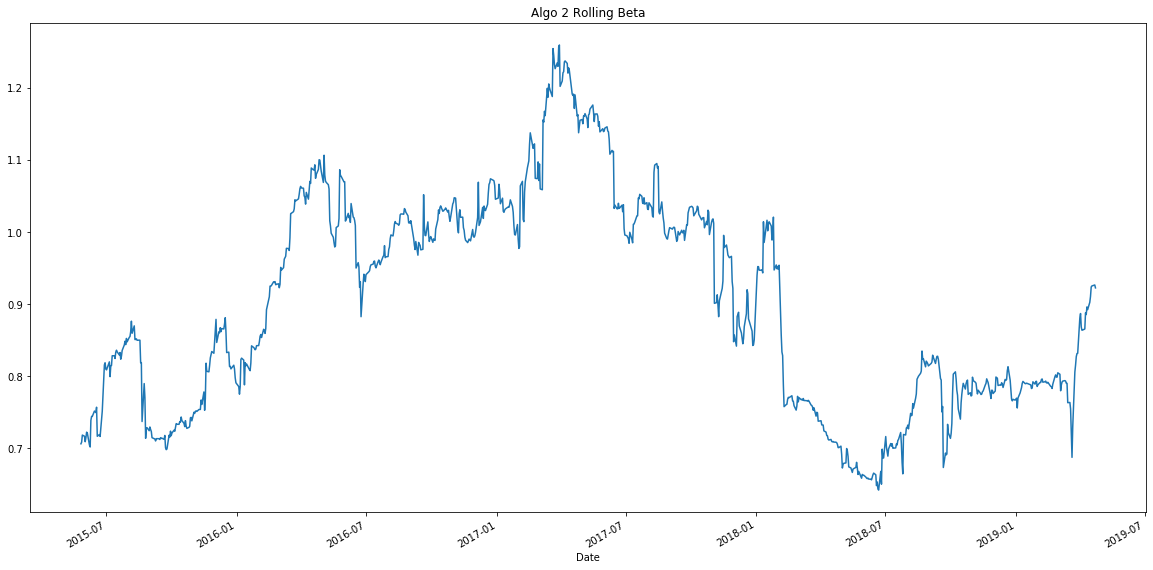

In [130]:
# Calculate 60-day rolling covariance Algo 2 compared to the total market (S&P 500)
roll_algo2_covariance = combined_df['Algo 2'].rolling(window=60).cov(combined_df['S&P 500'])
# Calculate 60-day rolling variance of S&P 500
roll_sp500_variance = combined_df['S&P 500'].rolling(window=60).var()
# Calculate 60-day rolling beta of Algo 2
roll_algo2_beta = roll_algo2_covariance / roll_sp500_variance
roll_algo2_beta.plot(figsize=(20,10), title="Algo 2 Rolling Beta")

Algo 2 sometimes performs better than the S&P.

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

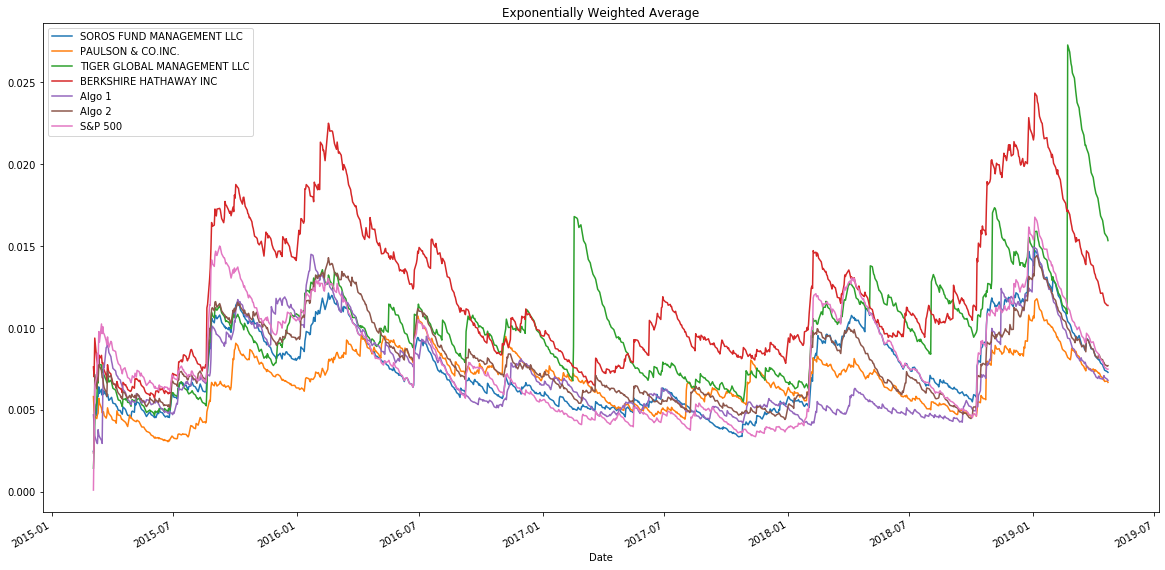

In [131]:
ewm_df=combined_df.ewm(halflife=21).std()
ewm_df.plot(figsize=(20,10), title="Exponentially Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [132]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

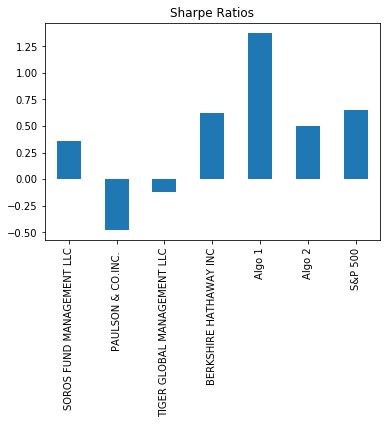

In [133]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

Algo 1 has the highest risk adjused return compared to the whales portfolio and S&P.  Algo 2 has a slighly lower risk adjusted return compared to Berkshire Hathaway and the S&P.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [134]:
# Read Renae's Stock Returns
renae_csv = Path("Resources/renaes_stocks.csv")
renae_df = pd.read_csv(renae_csv, parse_dates=True, infer_datetime_format=True)
renae_df.head()

,MO,Unnamed: 1,SHOP,Unnamed: 3,SWKS,Unnamed: 5,MDB,Unnamed: 7,NVDA,Unnamed: 9
0,Date,Close,Date,Close,Date,Close,Date,Close,Date,Close
1,5/13/2019 16:00:00,51.44,5/13/2019 16:00:00,250.79,5/13/2019 16:00:00,76.63,5/13/2019 16:00:00,127.84,5/13/2019 16:00:00,158.45
2,5/14/2019 16:00:00,51.89,5/14/2019 16:00:00,253.15,5/14/2019 16:00:00,78.11,5/14/2019 16:00:00,133.34,5/14/2019 16:00:00,162.04
3,5/15/2019 16:00:00,52.13,5/15/2019 16:00:00,264.16,5/15/2019 16:00:00,78.75,5/15/2019 16:00:00,138.44,5/15/2019 16:00:00,159.58
4,5/16/2019 16:00:00,52.03,5/16/2019 16:00:00,278.01,5/16/2019 16:00:00,73.99,5/16/2019 16:00:00,146.86,5/16/2019 16:00:00,160.19


In [135]:
# Rename 'Close' for each Stock to the Stock Name for easy Identification
renae_df.iloc[0,1]="MO"
renae_df.iloc[0,3]="SHOP"
renae_df.iloc[0,5]="SWKS"
renae_df.iloc[0,7]="MDB"
renae_df.iloc[0,9]="NVDA"
renae_df.head()

,MO,Unnamed: 1,SHOP,Unnamed: 3,SWKS,Unnamed: 5,MDB,Unnamed: 7,NVDA,Unnamed: 9
0,Date,MO,Date,SHOP,Date,SWKS,Date,MDB,Date,NVDA
1,5/13/2019 16:00:00,51.44,5/13/2019 16:00:00,250.79,5/13/2019 16:00:00,76.63,5/13/2019 16:00:00,127.84,5/13/2019 16:00:00,158.45
2,5/14/2019 16:00:00,51.89,5/14/2019 16:00:00,253.15,5/14/2019 16:00:00,78.11,5/14/2019 16:00:00,133.34,5/14/2019 16:00:00,162.04
3,5/15/2019 16:00:00,52.13,5/15/2019 16:00:00,264.16,5/15/2019 16:00:00,78.75,5/15/2019 16:00:00,138.44,5/15/2019 16:00:00,159.58
4,5/16/2019 16:00:00,52.03,5/16/2019 16:00:00,278.01,5/16/2019 16:00:00,73.99,5/16/2019 16:00:00,146.86,5/16/2019 16:00:00,160.19


In [136]:
# Remove duplicate Date Columns
renae_df.drop(['SHOP','SWKS','MDB','NVDA'], axis=1, inplace=True)
renae_df.head()

,MO,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9
0,Date,MO,SHOP,SWKS,MDB,NVDA
1,5/13/2019 16:00:00,51.44,250.79,76.63,127.84,158.45
2,5/14/2019 16:00:00,51.89,253.15,78.11,133.34,162.04
3,5/15/2019 16:00:00,52.13,264.16,78.75,138.44,159.58
4,5/16/2019 16:00:00,52.03,278.01,73.99,146.86,160.19


In [137]:
# Make first row header; reindex
renae_df.columns=renae_df.iloc[0]
renae_df = renae_df.reindex(renae_df.index.drop(0)).reset_index(drop=True)
renae_df.columns.name = None
renae_df.head()

,Date,MO,SHOP,SWKS,MDB,NVDA
0,5/13/2019 16:00:00,51.44,250.79,76.63,127.84,158.45
1,5/14/2019 16:00:00,51.89,253.15,78.11,133.34,162.04
2,5/15/2019 16:00:00,52.13,264.16,78.75,138.44,159.58
3,5/16/2019 16:00:00,52.03,278.01,73.99,146.86,160.19
4,5/17/2019 16:00:00,52.35,273.5,70.41,145.74,156.53


In [138]:
# Make Date column an index and change format to Year-Month-Day
renae_df['Date'] = pd.to_datetime(renae_df['Date'], infer_datetime_format=True)
renae_df['Date']=renae_df['Date'].dt.date

renae_df.set_index('Date', inplace=True)

renae_df.head()

,MO,SHOP,SWKS,MDB,NVDA
Date,,,,,
2019-05-13,51.44,250.79,76.63,127.84,158.45
2019-05-14,51.89,253.15,78.11,133.34,162.04
2019-05-15,52.13,264.16,78.75,138.44,159.58
2019-05-16,52.03,278.01,73.99,146.86,160.19
2019-05-17,52.35,273.5,70.41,145.74,156.53


In [140]:
# Sort datetime index in ascending order (past to present)
renae_df.sort_index(inplace=True)

renae_df.head()

,MO,SHOP,SWKS,MDB,NVDA
Date,,,,,
2019-05-13,51.44,250.79,76.63,127.84,158.45
2019-05-14,51.89,253.15,78.11,133.34,162.04
2019-05-15,52.13,264.16,78.75,138.44,159.58
2019-05-16,52.03,278.01,73.99,146.86,160.19
2019-05-17,52.35,273.5,70.41,145.74,156.53


In [141]:
# Check for nulls
renae_df.isnull().sum()

MO      0
SHOP    0
SWKS    0
MDB     0
NVDA    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [143]:
# Calculate daily returns
renae_daily_returns = renae_df.pct_change()
renae_daily_returns
# Calculate weighted portfolio returns
# weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# renae_returns = renae_daily_returns.dot(weights)
# renae_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

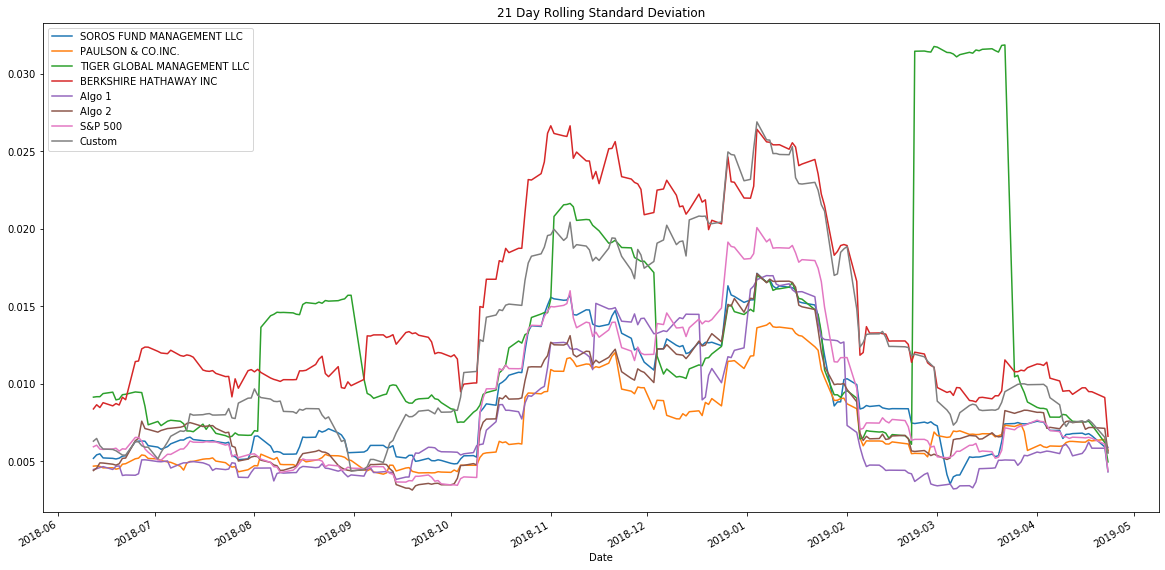

In [39]:
# Rolling
# YOUR CODE HERE

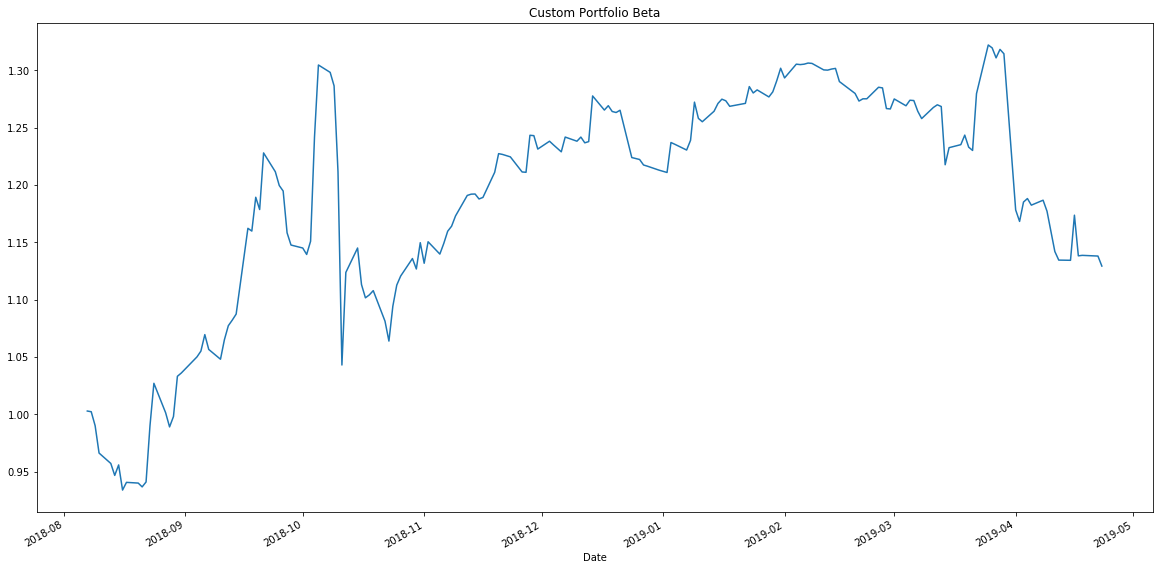

In [40]:
# Beta
# YOUR CODE HERE

In [41]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

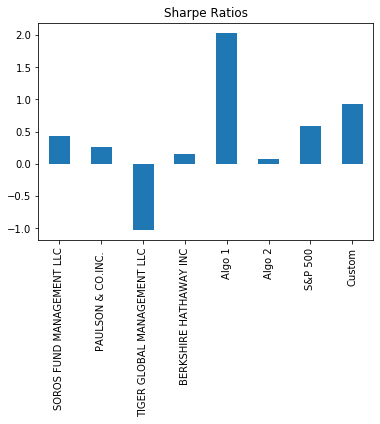

In [42]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [43]:
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000
